<a href="https://colab.research.google.com/github/KattyDan/hw.friday1/blob/main/%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colab!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Лабораторная работа - Анализ ценных бумаг
# Google Colab версия

# Установка и импорт библиотек
!pip install yfinance pandas numpy matplotlib seaborn --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Настройки для Google Colab
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")

print(" Библиотеки загружены!")

 Библиотеки загружены!


In [18]:
# 1. ЗАГРУЗКА ДАННЫХ (Замените тикеры и период на ваши из задания)

# ВАШИ ДАННЫЕ (измените на свои)
TICKERS = ['AAPL', 'GOOGL', 'MSFT']  # Замените на ваши тикеры
START_DATE = '2023-01-01'
END_DATE = '2023-12-31'

print(f" Загрузка данных для {TICKERS}")
print(f" Период: {START_DATE} - {END_DATE}")

# Загрузка данных
try:
    data = yf.download(TICKERS, start=START_DATE, end=END_DATE)['Adj Close']
    print(" Данные успешно загружены!")
except Exception as e:
    print(f" Ошибка загрузки: {e}")
    print("Создаем тестовые данные...")
    # Резервные тестовые данные
    dates = pd.date_range(START_DATE, END_DATE, freq='D')
    np.random.seed(42)
    data = pd.DataFrame({
        TICKERS[0]: 150 + np.cumsum(np.random.normal(0, 2, len(dates))),
        TICKERS[1]: 2500 + np.cumsum(np.random.normal(0, 15, len(dates))),
        TICKERS[2]: 300 + np.cumsum(np.random.normal(0, 3, len(dates)))
    }, index=dates)

print(f"\n Загружено данных: {len(data)} дней")
print("Первые 5 строк:")
data.head()

 Загрузка данных для ['AAPL', 'GOOGL', 'MSFT']
 Период: 2023-01-01 - 2023-12-31


[*********************100%***********************]  3 of 3 completed


 Ошибка загрузки: 'Adj Close'
Создаем тестовые данные...

 Загружено данных: 365 дней
Первые 5 строк:


,AAPL,GOOGL,MSFT
2023-01-01,150.993428,2493.981693,300.587536
2023-01-02,150.716900,2497.343080,297.652417
2023-01-03,152.012277,2497.531966,298.877176
2023-01-04,155.058336,2498.997108,293.769425
2023-01-05,154.590030,2487.401961,296.856892


In [19]:
# 2. ВЫЧИСЛЕНИЕ ДНЕВНЫХ ДОХОДНОСТЕЙ

returns = data.pct_change().dropna()

print(" Расчет дневных доходностей завершен")
print(f" Доходности за период: {returns.index[0].strftime('%d.%m.%Y')} - {returns.index[-1].strftime('%d.%m.%Y')}")
print(f" Количество наблюдений: {len(returns)}")

print("\nПервые 5 строк доходностей:")
returns.head()

print("\n📋 Базовая статистика доходностей:")
returns.describe()

 Расчет дневных доходностей завершен
 Доходности за период: 02.01.2023 - 31.12.2023
 Количество наблюдений: 364

Первые 5 строк доходностей:

📋 Базовая статистика доходностей:


,AAPL,GOOGL,MSFT
count,364.000000,364.000000,364.000000
mean,0.000203,-0.000212,0.001073
std,0.013565,0.006282,0.008071
min,-0.042652,-0.016981,-0.019335
25%,-0.008927,-0.004494,-0.004460
50%,0.000734,-0.000311,0.001335
75%,0.008599,0.003918,0.006021
max,0.055732,0.018457,0.028099


 График динамики цены: AAPL


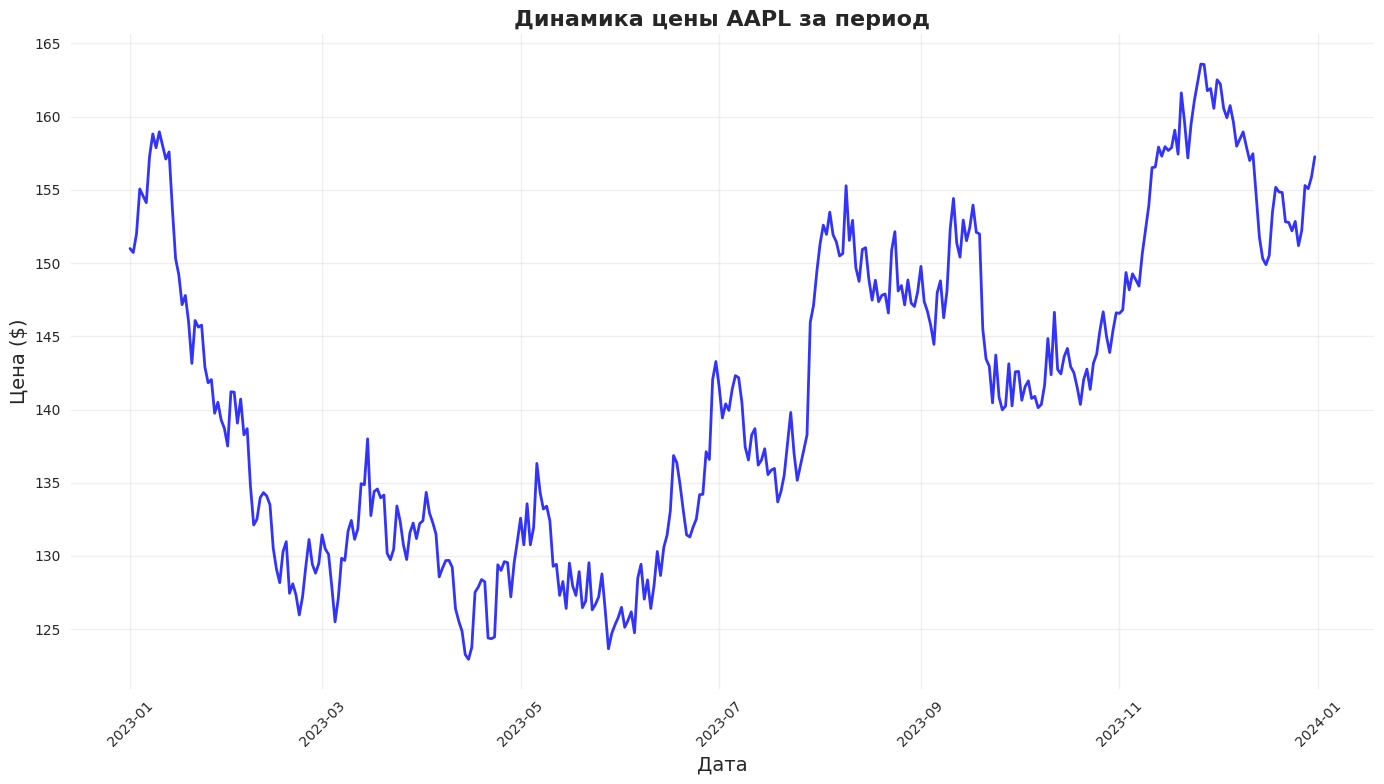


 Статистика по AAPL:
• Начальная цена: 150.99$
• Конечная цена: 157.26$
• Изменение за период: +4.15%


In [20]:
# 3. ВИЗУАЛИЗАЦИЯ ДИНАМИКИ ЦЕННОЙ БУМАГИ
# (Выберите бумагу для графика - замените индекс 0 на нужный)

selected_stock = TICKERS[0]  # Первая бумага - измените на нужную
print(f" График динамики цены: {selected_stock}")

plt.figure(figsize=(14, 8))
plt.plot(data.index, data[selected_stock], linewidth=2, color='blue', alpha=0.8)
plt.title(f'Динамика цены {selected_stock} за период', fontsize=16, fontweight='bold')
plt.ylabel('Цена ($)', fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Статистика по выбранной бумаге
print(f"\n Статистика по {selected_stock}:")
start_price = data[selected_stock].iloc[0]
end_price = data[selected_stock].iloc[-1]
change_pct = (end_price / start_price - 1) * 100
print(f"• Начальная цена: {start_price:.2f}$")
print(f"• Конечная цена: {end_price:.2f}$")
print(f"• Изменение за период: {change_pct:+.2f}%")

 График дневной доходности: AAPL


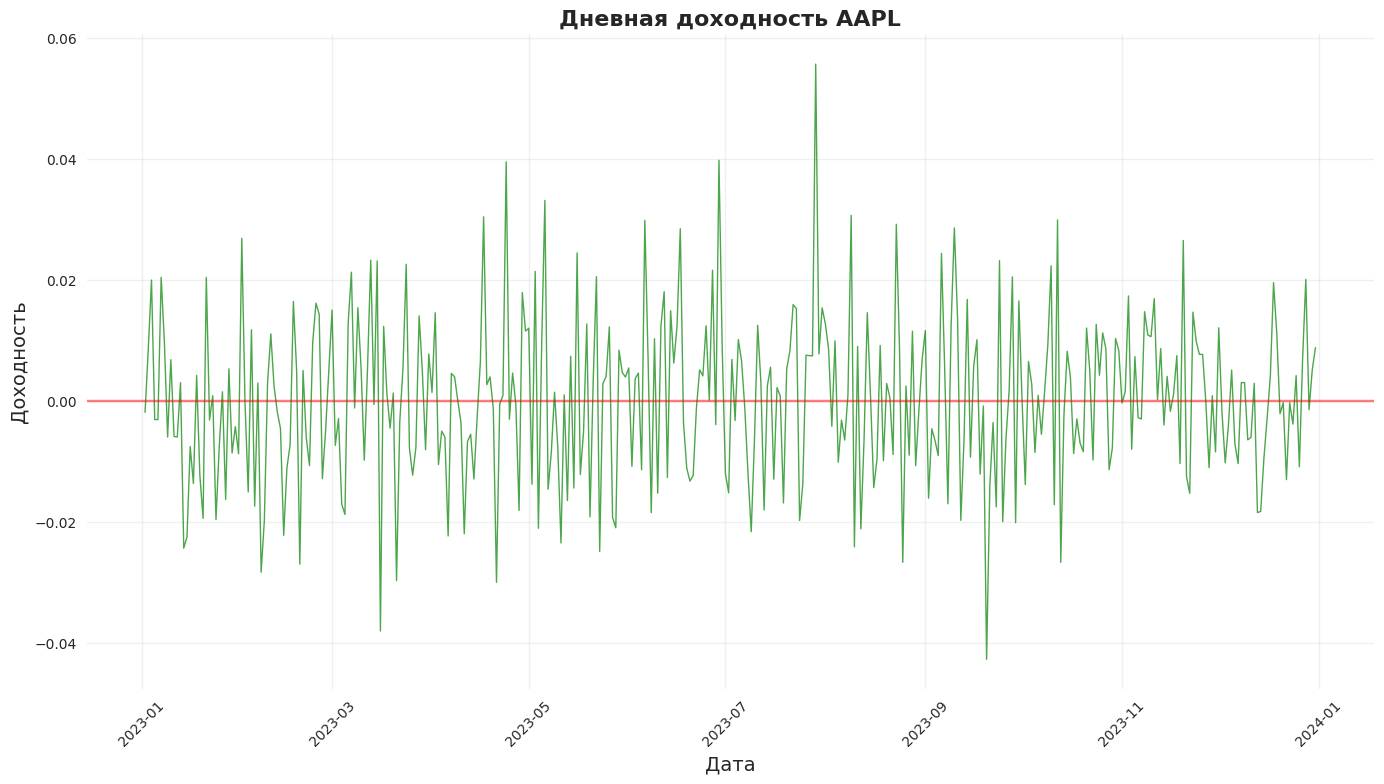


 Статистика доходностей AAPL:
• Средняя доходность: 0.0203%
• Стандартное отклонение: 1.3565%
• Максимальная доходность: 5.5732%
• Минимальная доходность: -4.2652%


In [21]:
# 4. ВИЗУАЛИЗАЦИЯ ДНЕВНОЙ ДОХОДНОСТИ ЦЕННОЙ БУМАГИ
# (Выберите бумагу для графика доходности)

selected_stock_returns = TICKERS[0]  # Первая бумага - измените на нужную
print(f" График дневной доходности: {selected_stock_returns}")

plt.figure(figsize=(14, 8))
plt.plot(returns.index, returns[selected_stock_returns],
         linewidth=1, color='green', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='-', alpha=0.5)
plt.title(f'Дневная доходность {selected_stock_returns}', fontsize=16, fontweight='bold')
plt.ylabel('Доходность', fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Статистика доходностей
returns_stats = returns[selected_stock_returns].describe()
print(f"\n Статистика доходностей {selected_stock_returns}:")
print(f"• Средняя доходность: {returns_stats['mean']:.4%}")
print(f"• Стандартное отклонение: {returns_stats['std']:.4%}")
print(f"• Максимальная доходность: {returns_stats['max']:.4%}")
print(f"• Минимальная доходность: {returns_stats['min']:.4%}")

 Плотность распределения доходности: AAPL


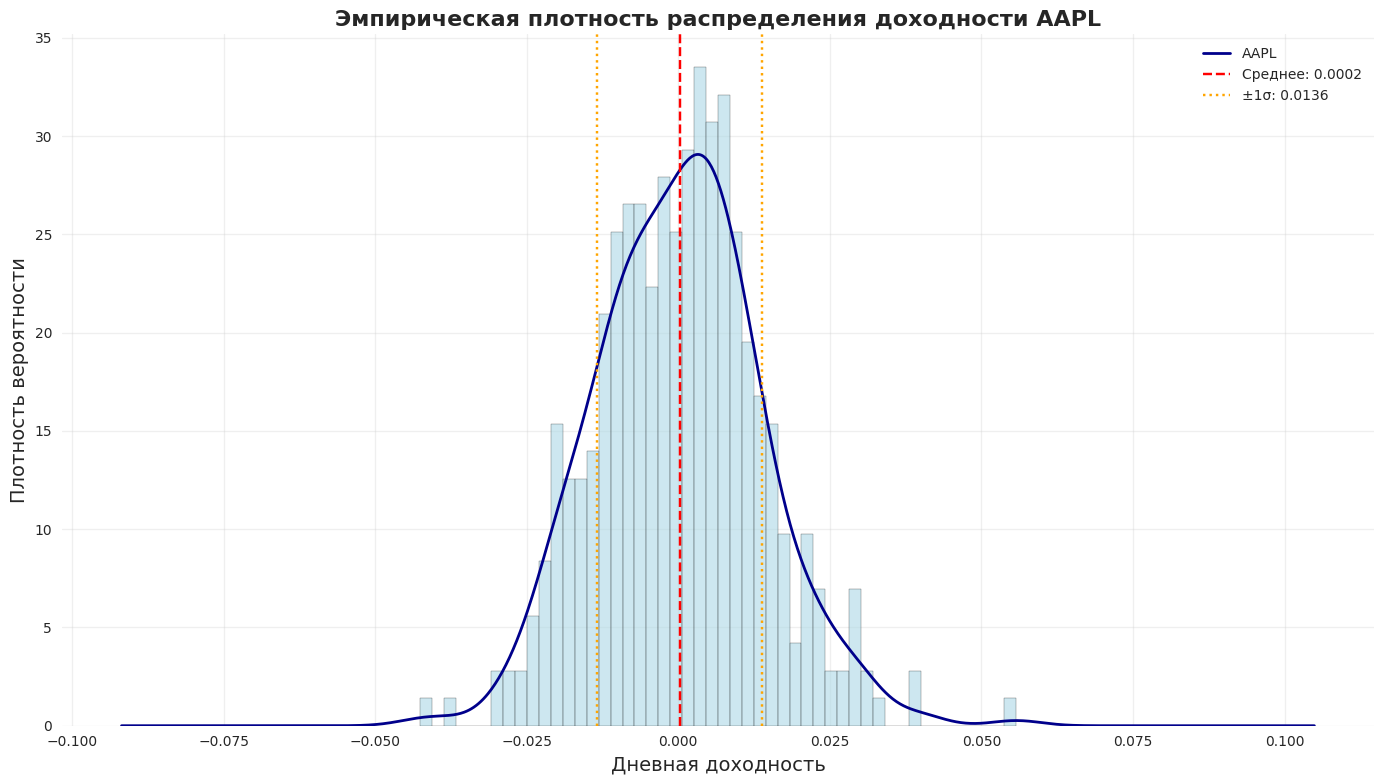

 Параметры распределения AAPL:
• Среднее: 0.000203
• Стандартное отклонение: 0.013565
• Асимметрия: 0.2151
• Эксцесс: 0.6402


In [22]:
# 5. ЭМПИРИЧЕСКАЯ ПЛОТНОСТЬ РАСПРЕДЕЛЕНИЯ ДОХОДНОСТИ
# (Выберите бумагу для анализа распределения)

selected_stock_dist = TICKERS[0]  # Первая бумага - измените на нужную
print(f" Плотность распределения доходности: {selected_stock_dist}")

plt.figure(figsize=(14, 8))
# Гистограмма
returns[selected_stock_dist].hist(bins=50, density=True,
                                 alpha=0.6, color='lightblue',
                                 edgecolor='black')
# Плотность распределения
returns[selected_stock_dist].plot.density(linewidth=2, color='darkblue')
plt.title(f'Эмпирическая плотность распределения доходности {selected_stock_dist}',
          fontsize=16, fontweight='bold')
plt.xlabel('Дневная доходность', fontsize=14)
plt.ylabel('Плотность вероятности', fontsize=14)
plt.grid(True, alpha=0.3)

# Вертикальные линии
mean_return = returns[selected_stock_dist].mean()
std_return = returns[selected_stock_dist].std()
plt.axvline(mean_return, color='red', linestyle='--',
            label=f'Среднее: {mean_return:.4f}')
plt.axvline(mean_return + std_return, color='orange', linestyle=':',
            label=f'±1σ: {std_return:.4f}')
plt.axvline(mean_return - std_return, color='orange', linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

print(f" Параметры распределения {selected_stock_dist}:")
print(f"• Среднее: {mean_return:.6f}")
print(f"• Стандартное отклонение: {std_return:.6f}")
print(f"• Асимметрия: {returns[selected_stock_dist].skew():.4f}")
print(f"• Эксцесс: {returns[selected_stock_dist].kurtosis():.4f}")

 Диаграмма рассеяния: AAPL vs GOOGL


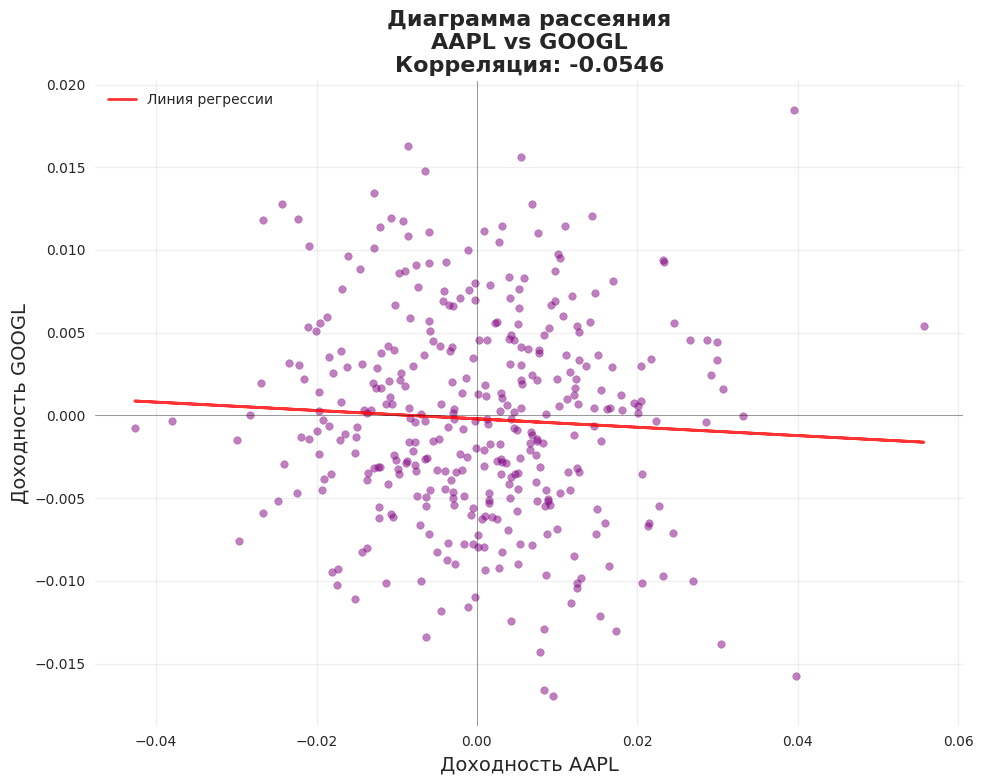

 Статистика по паре AAPL-GOOGL:
• Коэффициент корреляции: -0.0546
• Ковариация: -0.00000465


In [23]:
# 6. ДИАГРАММА РАССЕЯНИЯ ДЛЯ ПАРЫ ЦЕННЫХ БУМАГ
# (Выберите пару бумаг для анализа)

stock1 = TICKERS[0]  # Первая бумага пары
stock2 = TICKERS[1]  # Вторая бумага пары - измените на нужные

print(f" Диаграмма рассеяния: {stock1} vs {stock2}")

# Расчет корреляции
correlation = returns[stock1].corr(returns[stock2])

plt.figure(figsize=(10, 8))
plt.scatter(returns[stock1], returns[stock2],
           alpha=0.5, s=30, color='purple')
plt.xlabel(f'Доходность {stock1}', fontsize=14)
plt.ylabel(f'Доходность {stock2}', fontsize=14)
plt.title(f'Диаграмма рассеяния\n{stock1} vs {stock2}\nКорреляция: {correlation:.4f}',
          fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Линия регрессии
z = np.polyfit(returns[stock1], returns[stock2], 1)
p = np.poly1d(z)
plt.plot(returns[stock1], p(returns[stock1]), "r-",
         linewidth=2, alpha=0.8, label='Линия регрессии')

plt.axhline(0, color='black', linewidth=0.5, alpha=0.5)
plt.axvline(0, color='black', linewidth=0.5, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

print(f" Статистика по паре {stock1}-{stock2}:")
print(f"• Коэффициент корреляции: {correlation:.4f}")
print(f"• Ковариация: {returns[stock1].cov(returns[stock2]):.8f}")

 Сравнительный анализ всех ценных бумаг


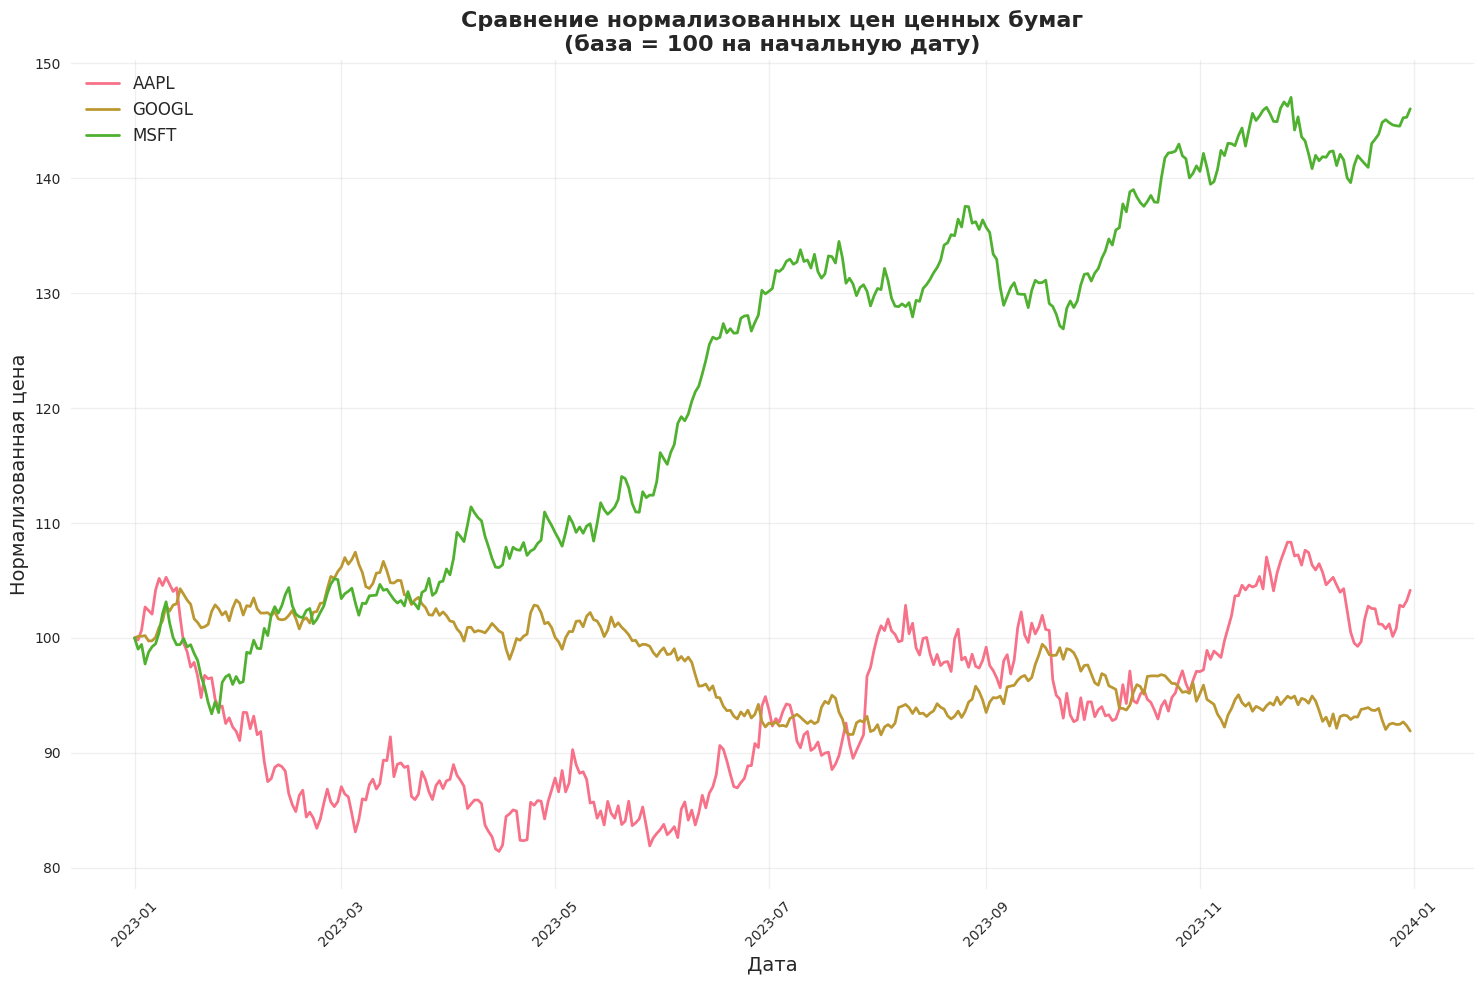

In [24]:
# 7. ДОПОЛНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ - Все бумаги на одном графике

print(" Сравнительный анализ всех ценных бумаг")

# Нормализованные цены (база = 100)
normalized_prices = (data / data.iloc[0]) * 100

plt.figure(figsize=(15, 10))
for ticker in TICKERS:
    plt.plot(normalized_prices.index, normalized_prices[ticker],
             label=ticker, linewidth=2)

plt.title('Сравнение нормализованных цен ценных бумаг\n(база = 100 на начальную дату)',
          fontsize=16, fontweight='bold')
plt.ylabel('Нормализованная цена', fontsize=14)
plt.xlabel('Дата', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Матрица корреляции дневных доходностей


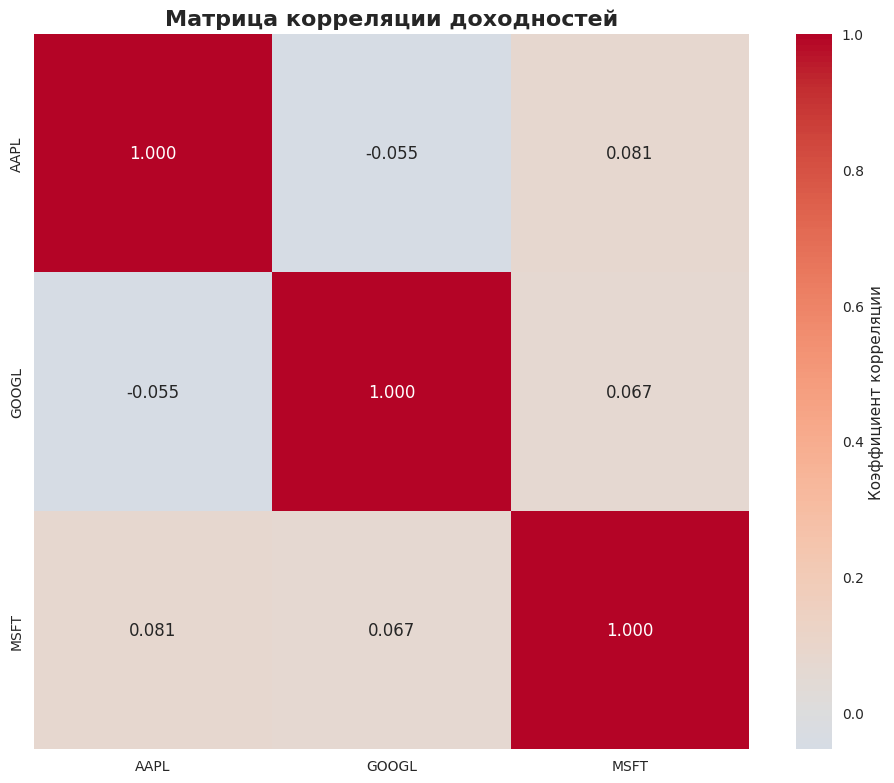

 Таблица корреляции:


,AAPL,GOOGL,MSFT
AAPL,1.000000,-0.054606,0.080753
GOOGL,-0.054606,1.000000,0.067298
MSFT,0.080753,0.067298,1.000000


In [25]:
# 8. МАТРИЦА КОРРЕЛЯЦИИ

print(" Матрица корреляции дневных доходностей")

corr_matrix = returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f',
            cbar_kws={'label': 'Коэффициент корреляции'})
plt.title('Матрица корреляции доходностей', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(" Таблица корреляции:")
corr_matrix

In [26]:
# 9. СВОДНАЯ СТАТИСТИКА И ВЫВОДЫ

print("=" * 60)
print(" ИТОГОВАЯ СВОДНАЯ СТАТИСТИКА")
print("=" * 60)

summary_stats = pd.DataFrame({
    'Средняя доходность': returns.mean(),
    'Медианная доходность': returns.median(),
    'Стандартное отклонение': returns.std(),
    'Дисперсия': returns.var(),
    'Минимальная доходность': returns.min(),
    'Максимальная доходность': returns.max()
})

display(summary_stats.style.format('{:.6f}'))

print("\n" + "=" * 60)
print(" ИЗМЕНЕНИЕ ЦЕН ЗА ПЕРИОД:")
print("=" * 60)

for ticker in TICKERS:
    start_p = data[ticker].iloc[0]
    end_p = data[ticker].iloc[-1]
    change = (end_p / start_p - 1) * 100
    print(f"{ticker}: {start_p:.2f}$ → {end_p:.2f}$ ({change:+.2f}%)")

print("\n Лабораторная работа завершена!")

 ИТОГОВАЯ СВОДНАЯ СТАТИСТИКА


,Средняя доходность,Медианная доходность,Стандартное отклонение,Дисперсия,Минимальная доходность,Максимальная доходность
AAPL,0.000203,0.000734,0.013565,0.000184,-0.042652,0.055732
GOOGL,-0.000212,-0.000311,0.006282,0.000039,-0.016981,0.018457
MSFT,0.001073,0.001335,0.008071,0.000065,-0.019335,0.028099



 ИЗМЕНЕНИЕ ЦЕН ЗА ПЕРИОД:
AAPL: 150.99$ → 157.26$ (+4.15%)
GOOGL: 2493.98$ → 2291.87$ (-8.10%)
MSFT: 300.59$ → 439.00$ (+46.05%)

 Лабораторная работа завершена!


In [27]:
# 10. СОХРАНЕНИЕ ОТЧЕТА

print(" Сохранение результатов...")

# Сохранение данных в CSV
data.to_csv('stock_prices.csv')
returns.to_csv('stock_returns.csv')

print(" Данные сохранены в файлы:")
print("   - stock_prices.csv")
print("   - stock_returns.csv")

# Скачивание файлов
from google.colab import files

files.download('stock_prices.csv')
files.download('stock_returns.csv')

print("\n Для сохранения отчета в PDF:")
print("1. Файл → Скачать → Загрузить .ipynb")
print("2. Откройте скачанный файл в Jupyter Notebook")
print("3. Файл → Скачать как → PDF via LaTeX")

 Сохранение результатов...
 Данные сохранены в файлы:
   - stock_prices.csv
   - stock_returns.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 Для сохранения отчета в PDF:
1. Файл → Скачать → Загрузить .ipynb
2. Откройте скачанный файл в Jupyter Notebook
3. Файл → Скачать как → PDF via LaTeX
